<a href="https://colab.research.google.com/github/AlainWalbar/database/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the Moon Modeler software I drew the following:
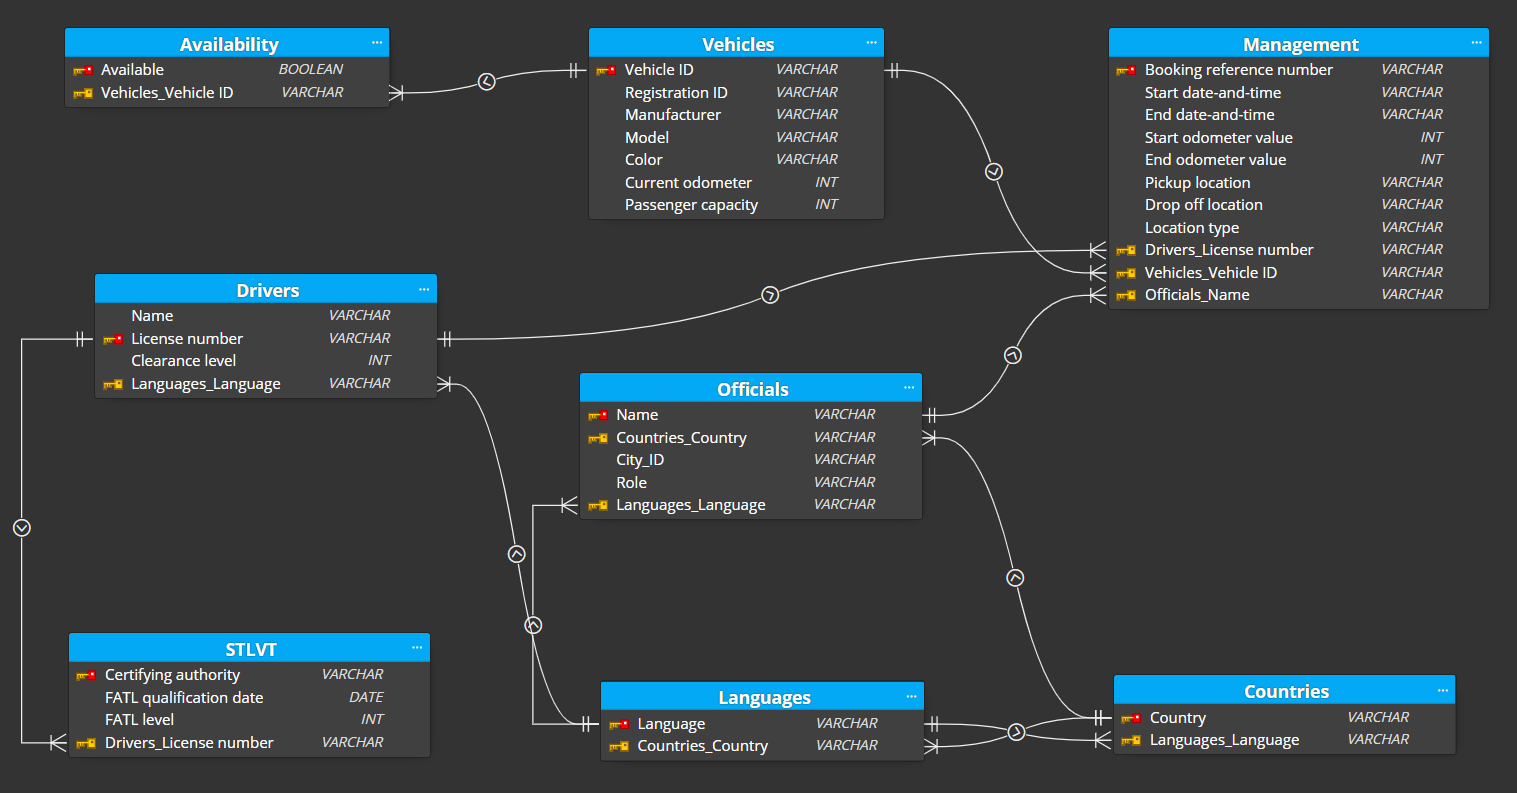

We then create a database file where we'll have our data and tables using the following:

In [1]:
from sqlalchemy import create_engine
my_conn = create_engine('sqlite:////content/my_db.db') 

We create the different tables and fill it with some data

In [2]:
r_set=my_conn.execute('''
CREATE TABLE `Vehicles`(
  `Vehicle ID` VARCHAR,
  `Registration ID` VARCHAR,
  `Manufacturer` VARCHAR,
  `Model` VARCHAR,
  `Color` VARCHAR,
  `Current odometer` INT,
  `Passenger capacity` INT,
  PRIMARY KEY(`Vehicle ID`)
);
''')

In [3]:
r_set=my_conn.execute('''INSERT INTO 'Vehicles'
(`Vehicle ID`, 'Registration ID', 'Manufacturer', 'Model', 'Color','Current odometer','Passenger capacity') VALUES
('V1000','2001 ABC','Volvo','XC90 SE','Silver',4350,4),
('V1001','2006 AFD','Kia','K7','Black',2195,4),
('V1002','2021 AHR','Tesla','2020 F','White',509,4),
('V1003','2020 DXF','Ford','Transit','Silver',974,2);''')

In [4]:
r_set=my_conn.execute('''SELECT * from 'Vehicles' ''');
for row in r_set:
  print(row)

('V1000', '2001 ABC', 'Volvo', 'XC90 SE', 'Silver', 4350, 4)
('V1001', '2006 AFD', 'Kia', 'K7', 'Black', 2195, 4)
('V1002', '2021 AHR', 'Tesla', '2020 F', 'White', 509, 4)
('V1003', '2020 DXF', 'Ford', 'Transit', 'Silver', 974, 2)


We then repeat this procedure for every table

In [5]:
r_set=my_conn.execute('''
CREATE TABLE `Availability`
  (`Available` BOOLEAN, 
  `Vehicles_Vehicle ID` VARCHAR, 
  PRIMARY KEY(`Available`)
  FOREIGN KEY (`Vehicles_Vehicle ID`) 
  REFERENCES `Vehicles` (`Vehicle ID`))
  ;
''')

In [6]:
r_set=my_conn.execute('''INSERT or REPLACE INTO 'Availability'
(`Available`, 'Vehicles_Vehicle ID') VALUES
(0,'V1000'),
(1,'V1001'),
(1,'V1002'),
(0,'V1003'); ''')

In [7]:
r_set=my_conn.execute('''SELECT * from 'Availability' ''');
for row in r_set:
  print(row)

(1, 'V1002')
(0, 'V1003')


In [8]:
r_set=my_conn.execute('''
CREATE TABLE `Countries`
  (`Country` VARCHAR, 
  `Languages_Language` VARCHAR, 
  PRIMARY KEY(`Country`)
  FOREIGN KEY (`Languages_Language`) 
  REFERENCES `Languages` (`Language`));
''')

In [9]:
r_set=my_conn.execute('''INSERT or REPLACE INTO 'Countries'
(`Country`, 'Languages_Language') VALUES
('Korea','KR'),
('England','EN'),
('France','FR');
 ''')

In [10]:
r_set=my_conn.execute('''SELECT * from 'Countries' ''');
for row in r_set:
  print(row)

('Korea', 'KR')
('England', 'EN')
('France', 'FR')


In [11]:
r_set=my_conn.execute('''
CREATE TABLE `Languages`
  (`Language` VARCHAR, 
  `Countries_Country` VARCHAR, 
  PRIMARY KEY(`Language`)
  FOREIGN KEY (`Countries_Country`) 
  REFERENCES `Countries` (`Country`));

''')

In [12]:
r_set=my_conn.execute('''INSERT or REPLACE INTO 'Languages'
(`Language`, 'Countries_Country') VALUES
('KR','Korea'),
('EN','England'),
('FR','France');
 ''')

In [13]:
r_set=my_conn.execute('''SELECT * from 'Languages' ''');
for row in r_set:
  print(row)

('KR', 'Korea')
('EN', 'England')
('FR', 'France')


In [14]:
r_set=my_conn.execute('''
CREATE TABLE `Drivers`(
  `Name` VARCHAR,
  `License number` VARCHAR,
  `Clearance level` INT,
  `Languages_Language` VARCHAR,
  PRIMARY KEY(`License number`)
  FOREIGN KEY (`Languages_Language`) 
  REFERENCES `Languages` (`Language`)
);
''')

In [15]:
r_set=my_conn.execute('''INSERT or REPLACE INTO 'Drivers'
(`Name`, `License number`, `Clearance level`, `Languages_Language`) VALUES
('Jean Nemar','1234',1,'FR,ENG'),
('Matris Xé','2423',0,'ENG'),
('Nick Moa','8593',0,'FR');
 ''')

In [16]:
r_set=my_conn.execute('''SELECT * from 'Drivers' ''');
for row in r_set:
  print(row)

('Jean Nemar', '1234', 1, 'FR,ENG')
('Matris Xé', '2423', 0, 'ENG')
('Nick Moa', '8593', 0, 'FR')


In [17]:
r_set=my_conn.execute('''
CREATE TABLE `Officials`(
  `Name` VARCHAR,
  `Countries_Country` VARCHAR,
  `City_ID` VARCHAR,
  `Role` VARCHAR,
  `Languages_Language` VARCHAR,
  PRIMARY KEY(`Name`)
  FOREIGN KEY (`Countries_Country`) 
  REFERENCES `Countries` (`Country`)
  FOREIGN KEY (`Languages_Language`) 
  REFERENCES `Languages` (`Language`)
);
''')

In [18]:
r_set=my_conn.execute('''INSERT or REPLACE INTO 'Officials'
(`Name`, `Countries_Country`, `City_ID`, `Role`, `Languages_Language`) VALUES
('Bap Tiste','France','Paris','Coach', 'FR,EN'),
('Moto Papi','England','London','Judge','KR,EN');
 ''')

In [19]:
r_set=my_conn.execute('''SELECT * from 'Officials' ''');
for row in r_set:
  print(row)

('Bap Tiste', 'France', 'Paris', 'Coach', 'FR,EN')
('Moto Papi', 'England', 'London', 'Judge', 'KR,EN')


In [20]:
r_set=my_conn.execute('''
CREATE TABLE `Management`(
  `Booking reference number` VARCHAR,
  `Start date-and-time` VARCHAR,
  `End date-and-time` VARCHAR,
  `Start odometer value` INT,
  `End odometer value` INT,
  `Pickup location` VARCHAR,
  `Drop off location` VARCHAR,
  `Location type` VARCHAR,
  `Drivers_License number` VARCHAR,
  `Vehicles_Vehicle ID` VARCHAR,
  `Officials_Name` VARCHAR,
  PRIMARY KEY(`Booking reference number`)
  FOREIGN KEY (`Drivers_License number`) 
  REFERENCES `Drivers` (`License number`)
  FOREIGN KEY (`Vehicles_Vehicle ID`) 
  REFERENCES `Vehicles` (`Vehicles ID`)
  FOREIGN KEY (`Officials_Name`) 
  REFERENCES `Officials` (`Name`)
);
''')

In [21]:
r_set=my_conn.execute('''INSERT or REPLACE INTO 'Management'
(`Booking reference number`, `Start date-and-time`, `End date-and-time`, `Start odometer value`, `End odometer value`,`Pickup location`,`Drop off location`,`Location type`,`Drivers_License number`,`Vehicles_Vehicle ID`,`Officials_Name`) VALUES
('REF1234','01/01/22 17:00','01/01/22 18:00','200','300','Airport','Hotel','Hotel','1234','V1001','Bap Tiste');

 ''')

In [22]:
r_set=my_conn.execute('''SELECT * from 'Management' ''');
for row in r_set:
  print(row)

('REF1234', '01/01/22 17:00', '01/01/22 18:00', 200, 300, 'Airport', 'Hotel', 'Hotel', '1234', 'V1001', 'Bap Tiste')


In [23]:
r_set=my_conn.execute('''
CREATE TABLE `STLVT`(
  `Certifying authority` VARCHAR,
  `FATL qualification date` DATE,
  `FATL level` INT,
  `Drivers_License number` VARCHAR,
  PRIMARY KEY(`Certifying authority`)
  FOREIGN KEY (`Drivers_License number`) 
  REFERENCES `Drivers` (`License number`)
);
''')

In [24]:
r_set=my_conn.execute('''INSERT or REPLACE INTO 'STLVT'
(`Certifying authority`, `FATL qualification date`, `FATL level`, `Drivers_License number`) VALUES
('Police','01/02/2003','3','1234');
 ''')

In [25]:
r_set=my_conn.execute('''SELECT * from 'STLVT' ''');
for row in r_set:
  print(row)

('Police', '01/02/2003', 3, '1234')
